# Clustering and Recommendation Systems

#### Madelin Rioux 300227635 &  Kendyl Snow 300240323

## Introduction

### The Movies Dataset

### Dataset Information

- **Dataset Name:** Full MovieLens Dataset with TMDB Metadata  
- **Author:** Assembled by a Data Science Career Track student at Springboard (Collaborator Rounak Banik) 
- **Purpose:**   
  This dataset was created to perform Exploratory Data Analysis (EDA) on movie data to tell the story of cinema. It also serves to build various types of recommender systems, including content-based and collaborative filtering models.

### Dataset Shape

### `movies_metadata.csv`
- **Rows:** 45,466 movies  
- **Columns:** 24 features  

### `ratings_small.csv`
- **Rows:** 100,004 ratings  
- **Columns:** 4 features  

### Feature List and Descriptions 
#### `movies_metadata.csv`

| Feature Name           | Description                                                               | Type                        |
|------------------------|---------------------------------------------------------------------------|-----------------------------|
| `adult`                | Whether the movie is adult-themed or not                                  | Categorical                 |
| `belongs_to_collection`| Data on collection the movie belongs to (if any)                          | Categorical (JSON/string)   |
| `budget`               | Budget of the movie in USD                                                | Numerical                   |
| `genres`               | List of genres for the movie                                              | Categorical (JSON/string)   |
| `homepage`             | URL of the movie's homepage (if available)                                | Categorical                 |
| `id`                   | TMDB ID of the movie                                                      | Categorical (ID)            |
| `imdb_id`              | IMDB ID of the movie                                                      | Categorical (ID)            |
| `original_language`    | Language in which the movie was originally produced                       | Categorical                 |
| `original_title`       | Original title of the movie                                               | Categorical                 |
| `overview`             | Short summary/description of the movie plot                               | Categorical (Text)          |
| `popularity`           | Popularity score assigned by TMDB                                         | Numerical                   |
| `poster_path`          | URL path to the movie's poster image                                      | Categorical                 |
| `production_companies` | List of companies that produced the movie                                 | Categorical (JSON/string)   |
| `production_countries` | List of countries involved in production                                  | Categorical (JSON/string)   |
| `release_date`         | Official release date                                                     | Categorical (Date)          |
| `revenue`              | Revenue generated by the movie in USD                                     | Numerical                   |
| `runtime`              | Duration of the movie in minutes                                          | Numerical                   |
| `spoken_languages`     | Languages spoken in the movie                                             | Categorical (JSON/string)   |
| `status`               | Release status of the movie (e.g. Released, Post Production)              | Categorical                 |
| `tagline`              | Catchphrase or tagline of the movie                                       | Categorical                 |
| `title`                | Title of the movie                                                        | Categorical                 |
| `video`                | Boolean indicating if it’s a video release                                | Categorical                 |
| `vote_average`         | Average rating score on TMDB                                              | Numerical                   |
| `vote_count`           | Number of user votes received on TMDB                                     | Numerical                   |

#### `ratings_small.csv`

| Feature Name | Description                                  | Type     |
|--------------|----------------------------------------------|----------|
| `userId`     | Unique ID for each user                      | Numerical (int64) |
| `movieId`    | Unique ID for each movie                     | Numerical (int64) |
| `rating`     | Rating given by the user (1.0 to 5.0 scale)  | Numerical (float64) |
| `timestamp`  | Time when the rating was submitted (epoch)   | Numerical (int64) |

### Additional Files

- `keywords.csv`: Plot keywords per movie (as stringified JSON)  
- `credits.csv`: Cast and crew details (stringified JSON)  
- `links.csv`: TMDB and IMDB IDs for movies  
- `links_small.csv`: Smaller subset of links for 9,000 movies  

### Explanation for Choice of Dataset

This dataset provides:

- Movie metadata (budget, revenue, genres, cast, etc.)
- User rating behavior (for recommendation systems)

It is ideal for tasks such as:

- Similarity Measures
- Clustering Algorithims 
- Content based recommendation systems
- Collaborative Filtering Recommendation System

### THIS IS TEMPORARY 

(only so we dont have to add the dataset to github)

In [2]:
import kagglehub
import os

path = kagglehub.dataset_download("rounakbanik/the-movies-dataset")


In [3]:



csv_path_metadata = os.path.join(path, "movies_metadata.csv")
csv_path_ratings = os.path.join(path, "ratings_small.csv")


metadata_df_og = pd.read_csv(csv_path_metadata)
ratings_df_og = pd.read_csv(csv_path_ratings)

## Importations 

In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import LocalOutlierFactor
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import euclidean, cityblock
from difflib import SequenceMatcher
from Levenshtein import distance as levenshtein_distance
import ast
import json
from sklearn.metrics.pairwise import cosine_similarity

import warnings
warnings.filterwarnings('ignore')
from scipy.spatial.distance import cdist

## Reading of the datasets

We will add this back in once finished (when submitting)

In [108]:
# metadata_df_og = pd.read_csv('datasets/movies_metadata.csv')
# ratings_df_og = pd.read_csv('datasets/ratings_small.csv')

## EDA

**MetaData df**

In [5]:
metadata_df_og.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [6]:
unique_counts = metadata_df_og.nunique()
print(unique_counts)

adult                        5
belongs_to_collection     1698
budget                    1226
genres                    4069
homepage                  7673
id                       45436
imdb_id                  45417
original_language           92
original_title           43373
overview                 44307
popularity               44176
poster_path              45024
production_companies     22708
production_countries      2393
release_date             17336
revenue                   6863
runtime                    353
spoken_languages          1931
status                       6
tagline                  20283
title                    42277
video                        2
vote_average                92
vote_count                1820
dtype: int64


In [7]:
metadata_df_og.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


We will compute all our changes on a copy of the original dataframe

In [8]:
metadata_df = metadata_df_og.copy()

We will begin by deleting columns that are unimportant to our analysis

In [9]:
metadata_df = metadata_df.drop(['homepage','imdb_id','poster_path','status','video'], axis=1)

As we can note, Collection, genres, and spoken languages are currently in JSON format. First we will convert them to useful columns
https://www.w3schools.com/python/python_json.asp#:~:text=If%20you%20have%20a%20JSON,will%20be%20a%20Python%20dictionary.

In [10]:
def extract_json(string):
    try:
        json_dict = json.loads(string.replace("'", '"'))
        return json_dict['name']
    except:
        return None


In [11]:
metadata_df['belongs_to_collection'] = metadata_df['belongs_to_collection'].apply(extract_json)

https://docs.python.org/3/library/ast.html

In [12]:
def extract_array_json(string):
    try:
        dicts = ast.literal_eval(string)
        return [d['name'] for d in dicts]
    except:
        return []


In [13]:
metadata_df['genres_list'] = metadata_df['genres'].apply(extract_array_json)
metadata_df['spoken_languages_list'] = metadata_df['spoken_languages'].apply(extract_array_json)
metadata_df['production_companies_list'] = metadata_df['production_companies'].apply(extract_array_json)
metadata_df['production_countries_list'] = metadata_df['production_countries'].apply(extract_array_json)

In [14]:
metadata_df.head()

,adult,belongs_to_collection,budget,genres,id,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,tagline,title,vote_average,vote_count,genres_list,spoken_languages_list,production_companies_list,production_countries_list
0,False,Toy Story Collection,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,"[{'name': 'Pixar Animation Studios', 'id': 3}]",...,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",NaN,Toy Story,7.7,5415.0,"[Animation, Comedy, Family]",[English],[Pixar Animation Studios],[United States of America]
1,False,None,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...",...,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Roll the dice and unleash the excitement!,Jumanji,6.9,2413.0,"[Adventure, Fantasy, Family]","[English, Français]","[TriStar Pictures, Teitler Film, Interscope Co...",[United States of America]
2,False,Grumpy Old Men Collection,0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...",...,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,6.5,92.0,"[Romance, Comedy]",[English],"[Warner Bros., Lancaster Gate]",[United States of America]
3,False,None,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,[{'name': 'Twentieth Century Fox Film Corporat...,...,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Friends are the people who let you be yourself...,Waiting to Exhale,6.1,34.0,"[Comedy, Drama, Romance]",[English],[Twentieth Century Fox Film Corporation],[United States of America]
4,False,Father of the Bride Collection,0,"[{'id': 35, 'name': 'Comedy'}]",11862,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,"[{'name': 'Sandollar Productions', 'id': 5842}...",...,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,5.7,173.0,[Comedy],[English],"[Sandollar Productions, Touchstone Pictures]",[United States of America]


Now we can remove the JSON columns

In [15]:
metadata_df = metadata_df.drop(['genres','spoken_languages','production_companies', 'production_countries'], axis=1)

In [16]:
metadata_df.head()

,adult,belongs_to_collection,budget,id,original_language,original_title,overview,popularity,release_date,revenue,runtime,tagline,title,vote_average,vote_count,genres_list,spoken_languages_list,production_companies_list,production_countries_list
0,False,Toy Story Collection,30000000,862,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,1995-10-30,373554033.0,81.0,NaN,Toy Story,7.7,5415.0,"[Animation, Comedy, Family]",[English],[Pixar Animation Studios],[United States of America]
1,False,None,65000000,8844,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,1995-12-15,262797249.0,104.0,Roll the dice and unleash the excitement!,Jumanji,6.9,2413.0,"[Adventure, Fantasy, Family]","[English, Français]","[TriStar Pictures, Teitler Film, Interscope Co...",[United States of America]
2,False,Grumpy Old Men Collection,0,15602,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,1995-12-22,0.0,101.0,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,6.5,92.0,"[Romance, Comedy]",[English],"[Warner Bros., Lancaster Gate]",[United States of America]
3,False,None,16000000,31357,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,1995-12-22,81452156.0,127.0,Friends are the people who let you be yourself...,Waiting to Exhale,6.1,34.0,"[Comedy, Drama, Romance]",[English],[Twentieth Century Fox Film Corporation],[United States of America]
4,False,Father of the Bride Collection,0,11862,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,1995-02-10,76578911.0,106.0,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,5.7,173.0,[Comedy],[English],"[Sandollar Productions, Touchstone Pictures]",[United States of America]


Now we will ensure that each column is the accurate column type

In [17]:
#converting 'budget', 'popularity','id' to numeric
metadata_df['budget'] = pd.to_numeric(metadata_df['budget'], errors='coerce')
metadata_df['popularity'] = pd.to_numeric(metadata_df['popularity'], errors='coerce')
metadata_df['id'] = pd.to_numeric(metadata_df['id'], errors='coerce')

#converting 'release_date' to datetime
metadata_df['release_date'] = pd.to_datetime(metadata_df['release_date'], errors='coerce')

## Convert 'adult' string to boolean
metadata_df['adult'] = metadata_df['adult'].astype(bool)

Now we want to split up realse date and year (so it is easier to find similairties to)

In [18]:
metadata_df['release_year'] = metadata_df['release_date'].dt.year
metadata_df['release_month'] = metadata_df['release_date'].dt.month
metadata_df = metadata_df.drop(columns=['release_date'])

In [19]:
metadata_df.head()

,adult,belongs_to_collection,budget,id,original_language,original_title,overview,popularity,revenue,runtime,tagline,title,vote_average,vote_count,genres_list,spoken_languages_list,production_companies_list,production_countries_list,release_year,release_month
0,True,Toy Story Collection,30000000.0,862.0,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,373554033.0,81.0,NaN,Toy Story,7.7,5415.0,"[Animation, Comedy, Family]",[English],[Pixar Animation Studios],[United States of America],1995.0,10.0
1,True,None,65000000.0,8844.0,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,262797249.0,104.0,Roll the dice and unleash the excitement!,Jumanji,6.9,2413.0,"[Adventure, Fantasy, Family]","[English, Français]","[TriStar Pictures, Teitler Film, Interscope Co...",[United States of America],1995.0,12.0
2,True,Grumpy Old Men Collection,0.0,15602.0,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.712900,0.0,101.0,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,6.5,92.0,"[Romance, Comedy]",[English],"[Warner Bros., Lancaster Gate]",[United States of America],1995.0,12.0
3,True,None,16000000.0,31357.0,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,81452156.0,127.0,Friends are the people who let you be yourself...,Waiting to Exhale,6.1,34.0,"[Comedy, Drama, Romance]",[English],[Twentieth Century Fox Film Corporation],[United States of America],1995.0,12.0
4,True,Father of the Bride Collection,0.0,11862.0,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,76578911.0,106.0,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,5.7,173.0,[Comedy],[English],"[Sandollar Productions, Touchstone Pictures]",[United States of America],1995.0,2.0


check for duplicate id's

In [20]:
duplicate_count = metadata_df['id'].duplicated().sum()
print(f'Total duplicates: {duplicate_count}')

Total duplicates: 32


In [21]:
uniqueness_test_attribute = 'id'
duplicate_ids = metadata_df[metadata_df.duplicated(subset=[uniqueness_test_attribute], keep=False)]
if not duplicate_ids.empty:
    num_of_examples = min(2, len(duplicate_ids))

    first_duplicate_value = duplicate_ids[uniqueness_test_attribute].value_counts().idxmax()
    example_rows = duplicate_ids[duplicate_ids[uniqueness_test_attribute] == first_duplicate_value].head(num_of_examples)
    
    print(f"Duplicate values found in '{uniqueness_test_attribute}': {duplicate_ids.shape[0]}")
    print(f"See the following {num_of_examples} example{'s' if num_of_examples > 1 else ''}")
    display(example_rows)

Duplicate values found in 'id': 62
See the following 2 examples


,adult,belongs_to_collection,budget,id,original_language,original_title,overview,popularity,revenue,runtime,tagline,title,vote_average,vote_count,genres_list,spoken_languages_list,production_companies_list,production_countries_list,release_year,release_month
13261,True,None,0.0,141971.0,fi,Blackout,Recovering from a nail gun shot to the head an...,0.411949,0.0,108.0,Which one is the first to return - memory or t...,Blackout,6.7,3.0,"[Thriller, Mystery]",[suomi],[Filmiteollisuus Fine],[Finland],2008.0,12.0
13375,True,None,0.0,141971.0,fi,Blackout,Recovering from a nail gun shot to the head an...,0.411949,0.0,108.0,Which one is the first to return - memory or t...,Blackout,6.7,3.0,"[Thriller, Mystery]",[suomi],[Filmiteollisuus Fine],[Finland],2008.0,12.0


In [22]:
# Drop duplicated rows 
metadata_df = metadata_df.drop_duplicates(subset=['id'], keep='first')

Replace null values 

In [23]:
metadata_df.isnull().sum()

adult                            0
belongs_to_collection        42268
budget                           1
id                               1
original_language               11
original_title                   0
overview                       954
popularity                       4
revenue                          4
runtime                        261
tagline                      25033
title                            4
vote_average                     4
vote_count                       4
genres_list                      0
spoken_languages_list            0
production_companies_list        0
production_countries_list        0
release_year                    88
release_month                   88
dtype: int64

Don't want to keep movies where id id None (only 1 value)

In [24]:
metadata_df = metadata_df.dropna(subset=['id'])

In [25]:
metadata_df['genres_list'] = metadata_df['genres_list'].fillna('[]')
metadata_df['genres_list'] = metadata_df['genres_list'].fillna('[]')
metadata_df['budget'] = metadata_df['budget'].fillna(0).astype(float)
metadata_df['title'] = metadata_df['title'].fillna('Unknown')
metadata_df['overview'] = metadata_df['overview'].fillna('Unknown')
metadata_df['belongs_to_collection'] = metadata_df['belongs_to_collection'].fillna('Unknown')
metadata_df['original_language'] = metadata_df['original_language'].fillna('Unknown')
metadata_df['tagline'] = metadata_df['tagline'].fillna('Unknown')
metadata_df['popularity'] = metadata_df['popularity'].fillna(0).astype(float)
metadata_df['revenue'] = metadata_df['revenue'].fillna(0).astype(float)
metadata_df['runtime'] = metadata_df['runtime'].fillna(0).astype(float)
metadata_df['vote_count'] = metadata_df['vote_count'].fillna(0).astype(float)
metadata_df['vote_average'] = metadata_df['vote_average'].fillna(0).astype(float)
metadata_df['release_year'] = metadata_df['release_year'].fillna(0).astype(int)
metadata_df['release_month'] = metadata_df['release_month'].fillna(0).astype(int)

In [26]:
metadata_df.isnull().sum()

adult                        0
belongs_to_collection        0
budget                       0
id                           0
original_language            0
original_title               0
overview                     0
popularity                   0
revenue                      0
runtime                      0
tagline                      0
title                        0
vote_average                 0
vote_count                   0
genres_list                  0
spoken_languages_list        0
production_companies_list    0
production_countries_list    0
release_year                 0
release_month                0
dtype: int64

In [27]:
metadata_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45433 entries, 0 to 45465
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   adult                      45433 non-null  bool   
 1   belongs_to_collection      45433 non-null  object 
 2   budget                     45433 non-null  float64
 3   id                         45433 non-null  float64
 4   original_language          45433 non-null  object 
 5   original_title             45433 non-null  object 
 6   overview                   45433 non-null  object 
 7   popularity                 45433 non-null  float64
 8   revenue                    45433 non-null  float64
 9   runtime                    45433 non-null  float64
 10  tagline                    45433 non-null  object 
 11  title                      45433 non-null  object 
 12  vote_average               45433 non-null  float64
 13  vote_count                 45433 non-null  flo

Graphs (Viewing Data)

Feature Engineering

outlier detection

### Ratings dataset

In [28]:
ratings_df_og.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100004 entries, 0 to 100003
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100004 non-null  int64  
 1   movieId    100004 non-null  int64  
 2   rating     100004 non-null  float64
 3   timestamp  100004 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [29]:
ratings_df_og.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [30]:
ratings_df_og.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

### Study 1

**Similarity functions** https://ashukumar27.medium.com/similarity-functions-in-python-aa6dfe721035

In [76]:
# 1. Jaccard Similarity 
def jaccard_similarity(set1, set2):
    intersection = len(set(set1) & set(set2))
    union = len(set(set1) | set(set2))
    return intersection / union if union != 0 else 0

# 2. Euclidean Distance 
def euclidean_similarity(val1, val2):
    return 1 / (1 + euclidean([val1], [val2]))

# 3. Manhattan Distance 
def manhattan_similarity(val1, val2):
    return 1 / (1 + cityblock([val1], [val2]))

#  4. Levenshtein Distance 
def title_similarity(val1, val2):
    dist = levenshtein_distance(val1.lower(), val2.lower())
    max_len = max(len(val1), len(val2))
    return 1 - (dist / max_len)

# Euclidean Similarity 
def year_similarity(val1, val2):
    return 1 / (1 + euclidean([val1], [val2]))



In [77]:
# Request function
def get_top_n_results(similarity_scores, input_title):
    results_df = metadata_df.copy()
    results_df['similarity_score'] = similarity_scores
    results_df = results_df[results_df['title'] != input_title]
    results_df = results_df.sort_values(by='similarity_score', ascending=False).head(10)
    return results_df[['title', 'genres_list', 'budget', 'popularity', 'release_year', 'similarity_score']]


In [78]:
def sort_based_on_popularity(top_ten):
    return top_ten.sort_values(by='popularity', ascending=False)

show me 10 movies of the same genre as "Toy Story"

In [79]:
# 1. Similar movies by genre
toy_story_row = metadata_df.loc[metadata_df['title'] == 'Toy Story']
input_genre = toy_story_row['genres_list'].iloc[0]
similarity_scores = metadata_df['genres_list'].apply(lambda x: jaccard_similarity(input_genre, x)).values
print('Top 10 movies of the same genre as "Toy Story":')
display(sort_based_on_popularity(get_top_n_results(similarity_scores, 'Toy Story')))

Top 10 movies of the same genre as "Toy Story":


,title,genres_list,budget,popularity,release_year,similarity_score
3629,Chicken Run,"[Animation, Comedy, Family]",45000000.0,11.834245,2000,1.0
38108,Madly Madagascar,"[Animation, Comedy, Family]",0.0,11.463062,2013,1.0
13158,A Matter of Loaf and Death,"[Animation, Comedy, Family]",0.0,10.898525,2008,1.0
21990,Free Birds,"[Animation, Comedy, Family]",55000000.0,7.713231,2013,1.0
29673,Barbie as The Princess & the Pauper,"[Animation, Family, Comedy]",0.0,6.665069,2004,1.0
25026,The Madagascar Penguins in a Christmas Caper,"[Animation, Comedy, Family]",0.0,3.126703,2005,1.0
3309,Creature Comforts,"[Animation, Comedy, Family]",500000.0,2.329233,1989,1.0
18367,Mr. Bug Goes to Town,"[Animation, Comedy, Family]",0.0,1.216160,1941,1.0
38109,Hammy's Boomerang Adventure,"[Comedy, Family, Animation]",0.0,1.012941,2006,1.0
26316,Mr. Magoo's Christmas Carol,"[Animation, Comedy, Family]",0.0,0.972587,1962,1.0



show me 10 movies with similar budget as "Clueless"

In [80]:
# 2. Similar movies by budget
clueless_row = metadata_df.loc[metadata_df['title'] == 'Clueless']
input_budget = clueless_row['budget'].iloc[0]
similarity_scores = metadata_df['budget'].apply(lambda x: euclidean_similarity(x, input_budget)).values
print('\nTop 10 movies with similar budget as "Clueless":')
display(sort_based_on_popularity(get_top_n_results(similarity_scores, 'Clueless')))


Top 10 movies with similar budget as "Clueless":


,title,genres_list,budget,popularity,release_year,similarity_score
24013,Life of Crime,"[Comedy, Crime]",12000000.0,17.788579,2013,1.0
11399,For Your Consideration,"[Comedy, Drama]",12000000.0,12.142183,2006,1.0
11414,Snow Cake,"[Romance, Drama]",12000000.0,11.556057,2006,1.0
43003,Inspector Gadget 2,"[Action, Adventure, Comedy, Family]",12000000.0,10.923985,2003,1.0
18667,Project X,"[Comedy, Crime]",12000000.0,9.803023,2012,1.0
1569,Playing God,"[Drama, Action, Thriller, Crime]",12000000.0,9.657642,1997,1.0
20812,Erased,"[Action, Thriller]",12000000.0,9.329974,2012,1.0
6293,Battle of Britain,"[Action, Drama, History, War]",12000000.0,4.822357,1969,1.0
11496,Home of the Brave,"[Action, Drama]",12000000.0,4.068478,2006,1.0
6334,From Justin to Kelly,"[Comedy, Romance]",12000000.0,1.695369,2003,1.0


show me 10 movies with similar length as "Bad Boys"

In [81]:
# 3. Similar movies by runtime 
bad_boys_row = metadata_df.loc[metadata_df['title'] == 'Bad Boys']
input_popularity = bad_boys_row['runtime'].iloc[0]
similarity_scores = metadata_df['runtime'].apply(lambda x: manhattan_similarity(x, input_popularity)).values
print('\nTop 10 movies with similar length as "Bad Boys":')
display(sort_based_on_popularity(get_top_n_results(similarity_scores, 'Bad Boys')))



Top 10 movies with similar length as "Bad Boys":


,title,genres_list,budget,popularity,release_year,similarity_score
5556,Saturday Night Fever,"[Drama, Music]",3500000.0,13.657204,1977,1.0
9767,Be Cool,"[Comedy, Crime]",53000000.0,13.314233,2005,1.0
18288,New Year's Eve,"[Comedy, Romance]",56000000.0,6.948818,2011,1.0
11834,Fay Grim,"[Comedy, Thriller]",0.0,5.052905,2006,1.0
18299,Julia's Eyes,"[Horror, Thriller]",0.0,5.020398,2010,1.0
35835,Tomorrow,[Documentary],0.0,4.241058,2015,1.0
40666,The Distinguished Citizen,"[Comedy, Drama]",0.0,3.614272,2016,1.0
36184,My All American,[Drama],20000000.0,2.664286,2015,1.0
4372,Drowning by Numbers,"[Comedy, Drama]",0.0,2.264156,1988,1.0
41742,Strangled,[Thriller],0.0,1.145675,2016,1.0


show me 10 movies with similar title to "Fight Club"

In [82]:
# 4. Similar movies by title
input_title = 'Fight Club'
similarity_scores = metadata_df['title'].apply(lambda x: title_similarity(x, input_title)).values
print('\nTop 10 movies with similar title to "Fight Club":')
display(sort_based_on_popularity(get_top_n_results(similarity_scores, 'Fight Club')))


Top 10 movies with similar title to "Fight Club":


,title,genres_list,budget,popularity,release_year,similarity_score
10808,Eight Below,"[Adventure, Drama, Family]",40000000.0,13.876881,2006,0.545455
38577,Flight Crew,"[Drama, Action]",10000000.0,5.420460,2016,0.636364
23495,Flight 7500,"[Thriller, Horror, Mystery]",0.0,5.265969,2014,0.545455
43172,Female Fight Club,"[Drama, Action]",2000000.0,3.796019,2017,0.588235
33244,The Club,[Drama],0.0,3.534068,2015,0.600000
22092,The Club,[Horror],0.0,0.573367,1994,0.600000
35606,The Club,"[Drama, Comedy]",0.0,0.475739,1980,0.600000
22996,Fightville,[Documentary],0.0,0.439409,2011,0.600000
26242,Night Court,"[Crime, Drama, Thriller]",0.0,0.144281,1932,0.636364
26613,Right Cross,[Drama],0.0,0.063783,1950,0.545455


Show me 10 movies with similar release year to "Titanic"

In [83]:
# 5. Similar movies by release year
titanic_row = metadata_df.loc[metadata_df['title'] == 'Titanic']
input_year = titanic_row['release_year'].iloc[0]
similarity_scores = metadata_df['release_year'].apply(lambda x: year_similarity(x, input_year)).values
print('\nTop 10 movies with similar release year to "Titanic":')
display(sort_based_on_popularity(get_top_n_results(similarity_scores, 'Titanic')))


Top 10 movies with similar release year to "Titanic":


,title,genres_list,budget,popularity,release_year,similarity_score
1598,Starship Troopers,"[Adventure, Action, Thriller, Science Fiction]",105000000.0,14.412644,1997,1.0
1701,Suicide Kings,"[Action, Comedy, Crime, Drama, Thriller]",0.0,9.262719,1997,1.0
853,The Relic,"[Horror, Mystery, Thriller]",60000000.0,7.699967,1997,1.0
2695,Perfect Blue,"[Animation, Thriller]",0.0,6.487495,1997,1.0
1707,Fireworks,"[Crime, Drama]",0.0,5.044722,1997,1.0
1696,Love and Death on Long Island,"[Drama, Romance, Foreign]",0.0,0.785094,1997,1.0
1709,"Niagara, Niagara","[Drama, Romance]",0.0,0.782772,1997,1.0
4090,4 Little Girls,[Documentary],0.0,0.639411,1997,1.0
37955,Joey,"[Family, Foreign]",0.0,0.197417,1997,1.0
4103,Too Much Sleep,[],0.0,0.001177,1997,1.0


## Study 2

**For Optimal K values** : https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/
**For Kmeans**: https://www.datacamp.com/tutorial/k-means-clustering-python?utm_source=google&utm_medium=paid_search&utm_campaignid=19589720830&utm_adgroupid=157156377071&utm_device=c&utm_keyword=&utm_matchtype=&utm_network=g&utm_adpostion=&utm_creative=684592141199&utm_targetid=dsa-2218886984380&utm_loc_interest_ms=&utm_loc_physical_ms=9000668&utm_content=dsa~tofu~tutorial~machine-learning&accountid=9624585688&utm_campaign=230119_1-sea~dsa~tofu_2-b2c_3-nam_4-prc_5-na_6-na_7-le_8-pdsh-go_9-nb-e_10-na_11-na&gad_source=1&gbraid=0AAAAADQ9WsEpPqtjFOVm6blLCTSiG13wH&gclid=Cj0KCQjw16O_BhDNARIsAC3i2GBacHcfKbqUEejKviUlcHi1mE7VBC-hY-Pv-acuoE99OUsw9DjS2g8aAqrqEALw_wcB

In [97]:
## Find Optimal K
def find_optimal_k_manual(data, combo_name, max_k=10):
    distortions = []
    K = range(1, max_k)

    for k in K:
        kmeanModel = KMeans(n_clusters=k, random_state=42, n_init=10).fit(data)
        
         # Calculate distortion as the average squared distance from points to their cluster centers
        distortions.append(sum(np.min(cdist(data, kmeanModel.cluster_centers_, 'euclidean'), axis=1)**2) / data.shape[0])


    # Plot Distortion (Elbow Method)
    plt.figure(figsize=(8, 6))
    plt.plot(K, distortions, 'bx-', label='Distortion')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Distortion')
    plt.title(f'Elbow Method for Optimal k - {combo_name} (Distortion)')
    plt.legend()
    plt.show()


## Running K means using optimal k value as determined before

def run_kmeans_with_optimal_k(data, combo_name):
    optimal_k = find_optimal_k_manual(data, combo_name)
    kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
    clusters = kmeans.fit_predict(data)

    # Plot results
    plt.figure(figsize=(8, 6))
    plt.scatter(data[:, 0], data[:, 1], c=clusters, cmap='viridis', s=10)
    plt.title(f'KMeans Clustering ({combo_name}) with k={optimal_k}')
    plt.xlabel(combo_name.split(" vs ")[0])
    plt.ylabel(combo_name.split(" vs ")[1])
    plt.show()



In [98]:
### DBSCAN Clustering 
def run_dbscan(data, combo_name, eps_values, min_samples_values):
    for eps in eps_values:
        for min_samples in min_samples_values:
            dbscan = DBSCAN(eps=eps, min_samples=min_samples)
            clusters = dbscan.fit_predict(data)

            # Plot results
            plt.figure(figsize=(8, 6))
            plt.scatter(data[:, 0], data[:, 1], c=clusters, cmap='viridis', s=10)
            plt.title(f'DBSCAN Clustering ({combo_name}) with eps={eps}, min_samples={min_samples}')
            plt.xlabel(combo_name.split(" vs ")[0])
            plt.ylabel(combo_name.split(" vs ")[1])
            plt.show()

#### Combination Budget VS Popularity 

In [99]:
combo1_df = metadata_df[['budget', 'popularity']]
combo1_scaled = scaler.fit_transform(combo1_df)

Elbow Method to find the optimal # of K

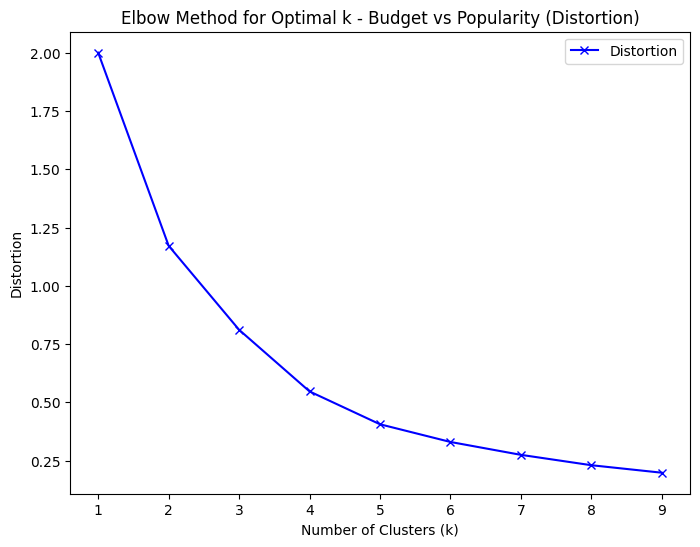

In [102]:
find_optimal_k_manual(combo1_scaled, 'Budget vs Popularity')

As we can see the optimal # of clusters occurs right around 4. We will use 3, 4, and 5 in our visualizations

**Run Clustering for Combination 1: Budget vs Popularity**

Clustering on Budget vs Popularity:


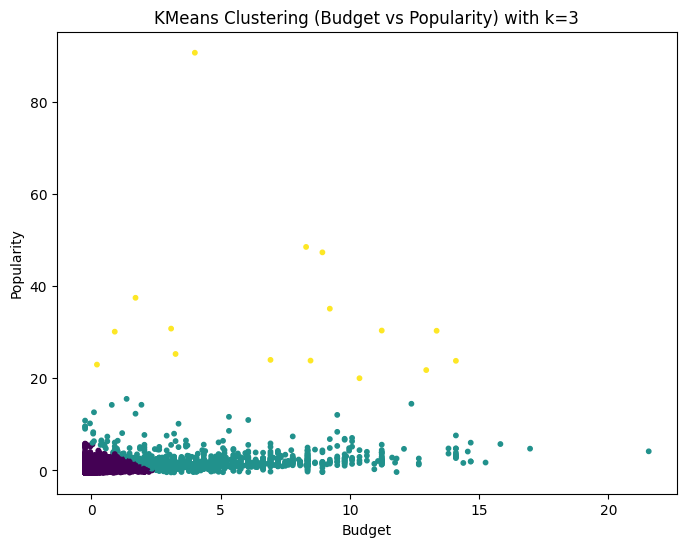

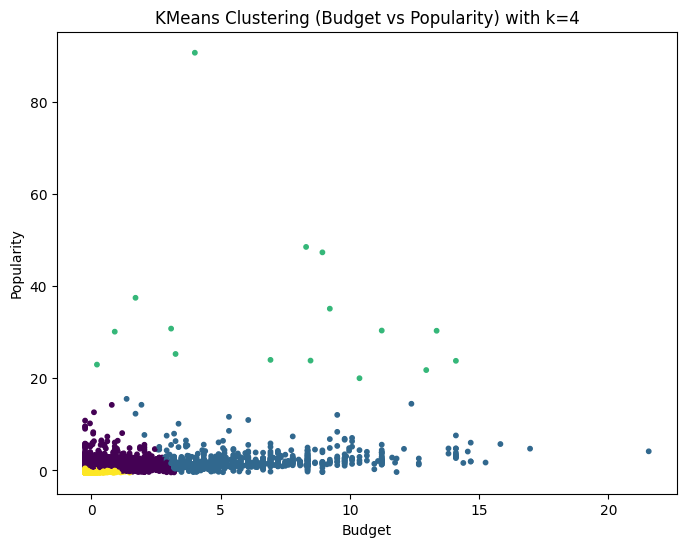

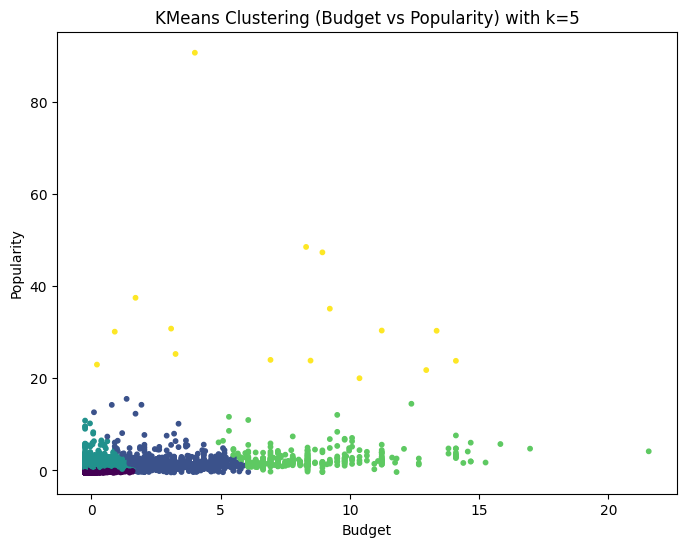

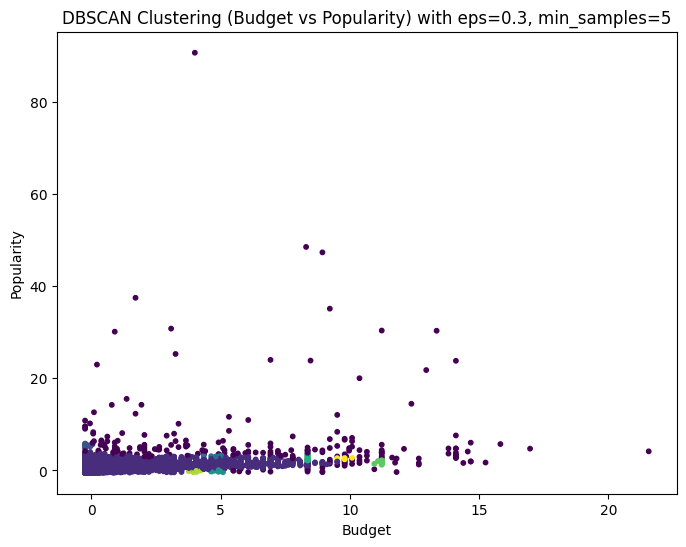

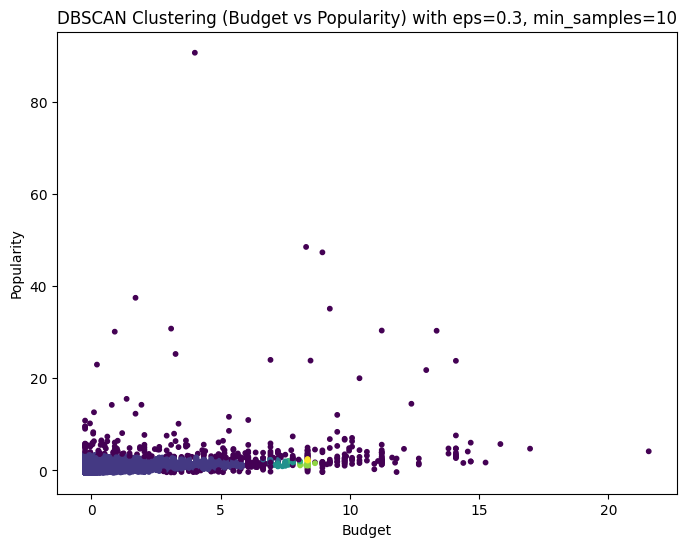

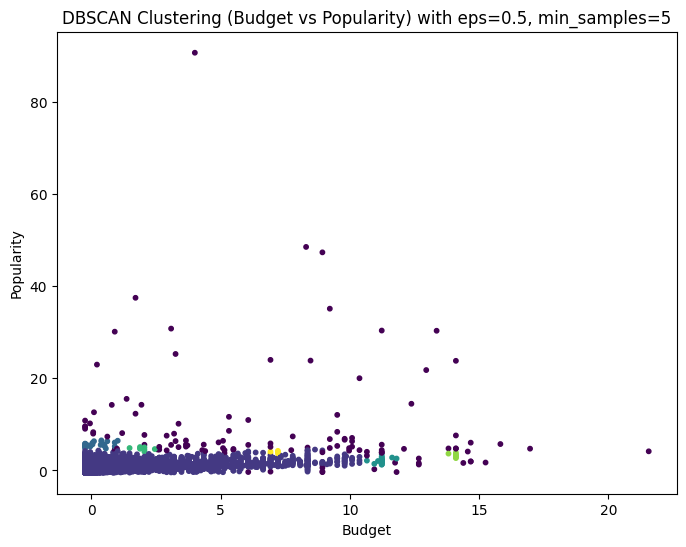

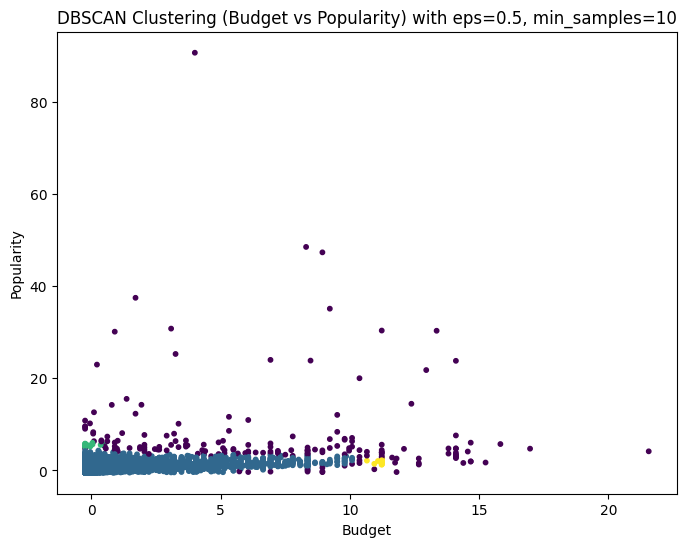

In [103]:
print('Clustering on Budget vs Popularity:')
k_values = [3,4,5]
eps_values = [0.3, 0.5]
min_samples_values = [5, 10]

run_kmeans(combo1_scaled, 'Budget vs Popularity', k_values)
run_dbscan(combo1_scaled, 'Budget vs Popularity', eps_values, min_samples_values)

#### Combination Budget VS Runtime

In [104]:
combo2_df = metadata_df[['budget', 'runtime']]
combo2_scaled = scaler.fit_transform(combo1_df)

elbow method to find the optimal # of K

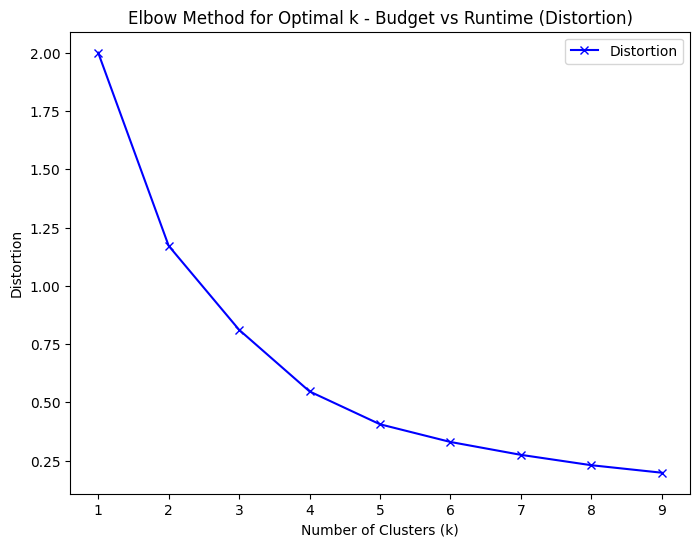

In [105]:
find_optimal_k_manual(combo2_scaled, 'Budget vs Runtime')

As we can see the optimal # of clusters occurs around 4-5. We will use 4, 5 and 6 in our testing. 

**Run Clustering for Combination 1: Budget vs Popularity**

Clustering on Budget vs Runtime :


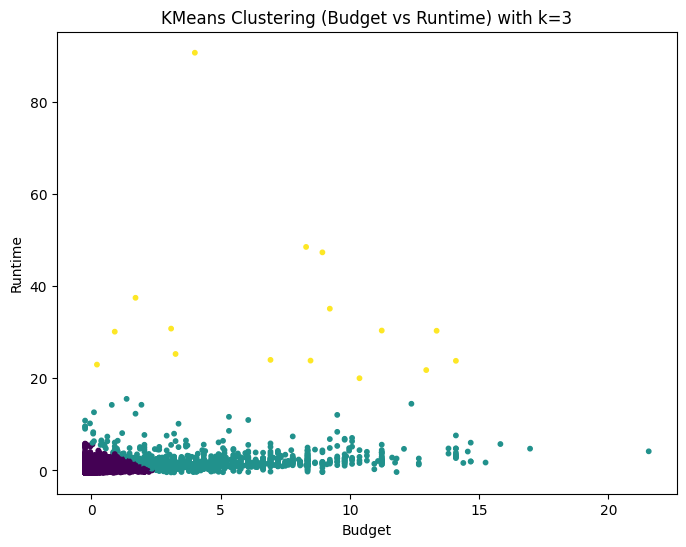

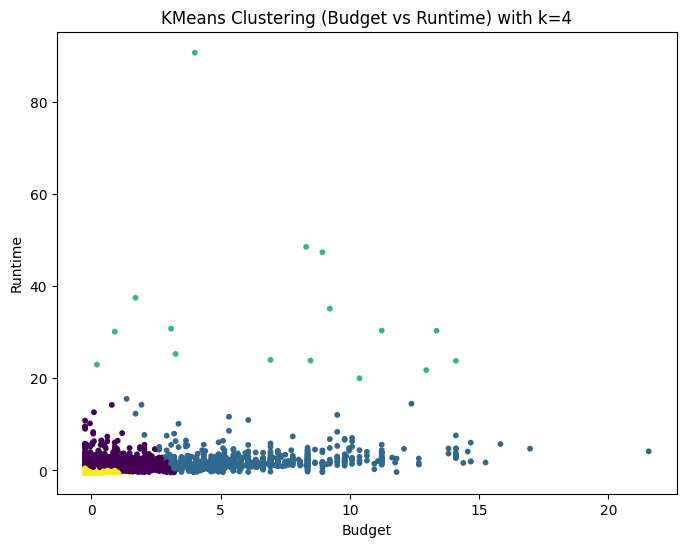

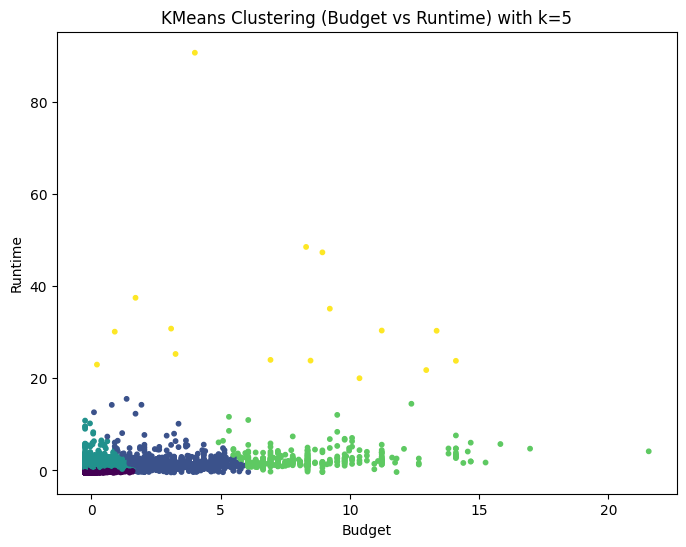

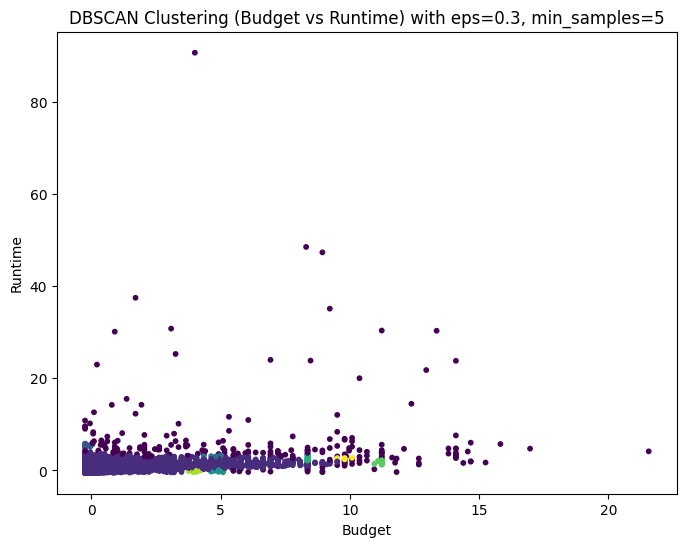

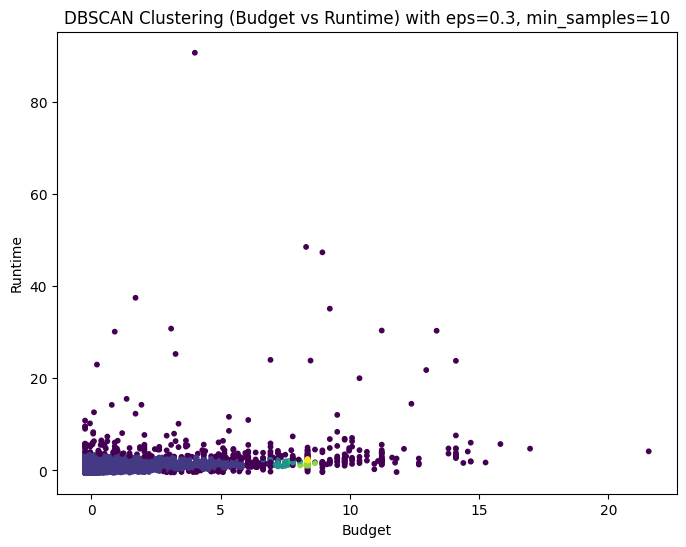

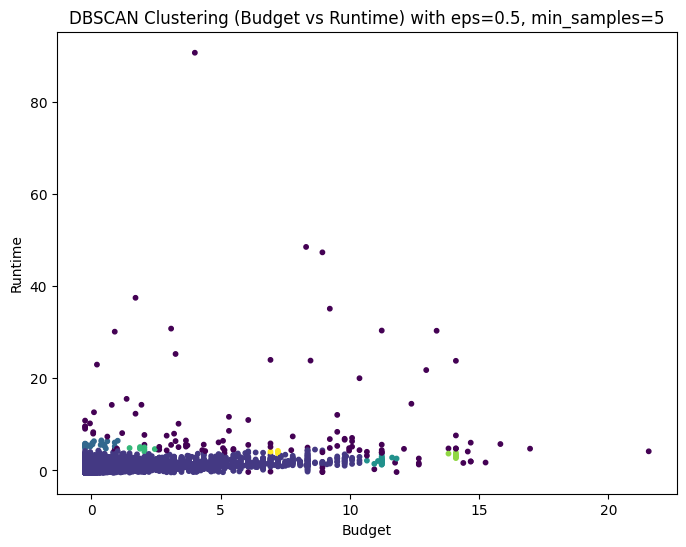

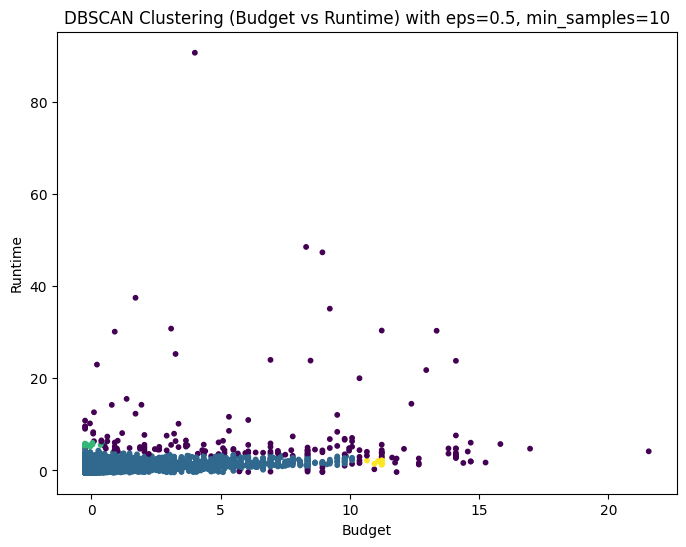

In [106]:
print('Clustering on Budget vs Runtime :')
k_values = [3,4,5]
eps_values = [0.3, 0.5]
min_samples_values = [5, 10]

run_kmeans(combo2_scaled, 'Budget vs Runtime', k_values)
run_dbscan(combo2_scaled, 'Budget vs Runtime', eps_values, min_samples_values)

## Study 3

In [88]:
def euclidean_distance_scalar(x, y):
    if not isinstance(x, (int, float)) or not isinstance(y, (int, float)):
        return 0
    return abs(x - y)


def jaccard_similarity(x,y):
    intersection_cardinality = len(set.intersection(*[set(x), set(y)]))
    union_cardinality = len(set.union(*[set(x), set(y)]))
    return intersection_cardinality/float(union_cardinality)

### Heuristic 1 (Jaccard + Euclidean)

def heuristic1(movie):
    print("\nTop 10 Movies similar to", movie)

    target_genres = metadata_df[metadata_df["original_title"] == movie]["genres_list"].values[0]

    metadata_df['Jaccard'] = metadata_df['genres_list'].apply(lambda x: jaccard_similarity(target_genres, x))

    target_popularity = metadata_df[metadata_df["original_title"] == movie]["popularity"].values[0]

    print(f"Target Genres: {target_genres} | Target Popularity Rating: {target_popularity}")

    metadata_df['Euclidean'] = metadata_df['popularity'].apply(lambda x: euclidean_distance_scalar(target_popularity, x))

    similar_movies = metadata_df[metadata_df["original_title"] != movie].copy()
    
    top_similar_movies = similar_movies.sort_values(["Jaccard", "Euclidean"], ascending=[False, True]).head(10)
    
    display(top_similar_movies[["original_title","genres_list","popularity","Jaccard", "Euclidean"]]) 




In [89]:
from numpy import sqrt
from scipy.spatial.distance import hamming as scipy_hamming


def hamming_distance(a, b):
    max_len = max(len(str(a)), len(str(b)))
    a = str(a).ljust(max_len)
    b = str(b).ljust(max_len)
    return scipy_hamming(list(a), list(b))

def euclidean_distance(x, y):
    x_list = [x] if isinstance(x, (int, float)) else x
    y_list = [y] if isinstance(y, (int, float)) else y
    return sqrt(sum(pow(a-b,2) for a, b in zip(x_list, y_list)))


## Heuristic 2 (Hamming + Euclidean)

def heuristic2(movie):
    print("\nTop 10 Movies similar to", movie)

    target_collection = metadata_df[metadata_df["original_title"] == movie]["belongs_to_collection"].values[0]
    target_votes = metadata_df[metadata_df["original_title"] == movie]["vote_average"].values[0]
    
    print(f"Target Collection: {target_collection} | Target Votes: {target_votes}")
    
    metadata_df['Hamming'] = metadata_df['belongs_to_collection'].apply(lambda x: 1 - hamming_distance(target_collection, x))
    
    metadata_df['Euclidean'] = metadata_df['vote_average'].apply(lambda x: euclidean_distance(target_votes, x))
    
    similar_movies = metadata_df[(metadata_df["original_title"] != movie)].copy()
    
    top_movies = similar_movies.sort_values(["Hamming", "Euclidean"], ascending=[False, True]).head(10)
    
    display(top_movies[["original_title", "vote_average", "belongs_to_collection", "Hamming", "Euclidean"]].round(3))



In [229]:

heuristic1('Toy Story')
heuristic2('Toy Story')


heuristic1('Jumanji')
heuristic2('Jumanji')


heuristic1('Waiting to Exhale')

heuristic2('Waiting to Exhale')


Top 10 Movies similar to Toy Story
Target Genres: ['Animation', 'Comedy', 'Family'] | Target Popularity Rating: 21.946943


,original_title,genres_list,popularity,Jaccard,Euclidean
21161,Despicable Me 2,"[Animation, Comedy, Family]",24.823550,1.0,2.876607
10520,Chicken Little,"[Animation, Family, Comedy]",18.584609,1.0,3.362334
2997,Toy Story 2,"[Animation, Comedy, Family]",17.547693,1.0,4.399250
4756,"Monsters, Inc.","[Animation, Comedy, Family]",26.419962,1.0,4.473019
15348,Toy Story 3,"[Animation, Family, Comedy]",16.966470,1.0,4.980473
21780,Cloudy with a Chance of Meatballs 2,"[Animation, Family, Comedy]",14.412061,1.0,7.534882
11959,The Simpsons Movie,"[Animation, Comedy, Family]",14.302911,1.0,7.644032
6795,Looney Tunes: Back in Action,"[Animation, Comedy, Family]",13.666488,1.0,8.280455
42235,The Boss Baby,"[Animation, Comedy, Family]",13.392824,1.0,8.554119
3629,Chicken Run,"[Animation, Comedy, Family]",11.834245,1.0,10.112698



Top 10 Movies similar to Toy Story
Target Collection: Toy Story Collection | Target Votes: 7.7


,original_title,vote_average,belongs_to_collection,Hamming,Euclidean
15348,Toy Story 3,7.6,Toy Story Collection,1.00,0.1
2997,Toy Story 2,7.3,Toy Story Collection,1.00,0.4
2503,The Mummy,6.6,The Mummy Collection,0.70,1.1
4698,La Boum,6.4,The Party Collection,0.70,1.3
5791,La Boum 2,6.3,The Party Collection,0.70,1.4
4142,The Mummy Returns,6.0,The Mummy Collection,0.70,1.7
12849,The Mummy: Tomb of the Dragon Emperor,5.2,The Mummy Collection,0.70,2.5
5077,The Nude Bomb,5.1,Get Smart Collection,0.70,2.6
32547,"Get Smart, Again!",4.1,Get Smart Collection,0.70,3.6
2175,The Thing,7.8,The Thing Collection,0.65,0.1



Top 10 Movies similar to Jumanji
Target Genres: ['Adventure', 'Fantasy', 'Family'] | Target Popularity Rating: 17.015539


,original_title,genres_list,popularity,Jaccard,Euclidean
14892,Alice in Wonderland,"[Family, Fantasy, Adventure]",17.285093,1.0,0.269554
10597,"The Chronicles of Narnia: The Lion, the Witch ...","[Adventure, Family, Fantasy]",18.135420,1.0,1.119881
38735,The BFG,"[Adventure, Family, Fantasy]",18.769476,1.0,1.753937
13893,Harry Potter and the Half-Blood Prince,"[Adventure, Fantasy, Family]",19.083723,1.0,2.068184
13318,Inkheart,"[Adventure, Family, Fantasy]",13.570926,1.0,3.444613
1858,Labyrinth,"[Adventure, Family, Fantasy]",13.009688,1.0,4.005851
12614,The Chronicles of Narnia: Prince Caspian,"[Adventure, Family, Fantasy]",12.490891,1.0,4.524648
16210,The Chronicles of Narnia: The Voyage of the Da...,"[Adventure, Family, Fantasy]",12.383398,1.0,4.632141
39336,Pete's Dragon,"[Adventure, Family, Fantasy]",12.189941,1.0,4.825598
892,The Wizard of Oz,"[Adventure, Family, Fantasy]",22.064932,1.0,5.049393



Top 10 Movies similar to Jumanji
Target Collection: Unknown | Target Votes: 6.9


,original_title,vote_average,belongs_to_collection,Hamming,Euclidean
38,Clueless,6.9,Unknown,1.0,0.0
40,Richard III,6.9,Unknown,1.0,0.0
61,Mr. Holland's Opus,6.9,Unknown,1.0,0.0
115,The Young Poisoner's Handbook,6.9,Unknown,1.0,0.0
243,Heavenly Creatures,6.9,Unknown,1.0,0.0
245,Immortal Beloved,6.9,Unknown,1.0,0.0
276,Murder in the First,6.9,Unknown,1.0,0.0
279,New Jersey Drive,6.9,Unknown,1.0,0.0
284,Natural Born Killers,6.9,Unknown,1.0,0.0
337,Muriel's Wedding,6.9,Unknown,1.0,0.0



Top 10 Movies similar to Waiting to Exhale
Target Genres: ['Comedy', 'Drama', 'Romance'] | Target Popularity Rating: 3.859495


,original_title,genres_list,popularity,Jaccard,Euclidean
8366,Mr. Deeds Goes to Town,"[Comedy, Drama, Romance]",3.854120,1.0,0.005375
2575,An Ideal Husband,"[Drama, Comedy, Romance]",3.873796,1.0,0.014301
11654,Man About Town,"[Comedy, Drama, Romance]",3.874408,1.0,0.014913
8491,It Should Happen to You,"[Comedy, Drama, Romance]",3.883222,1.0,0.023727
5258,Bus Stop,"[Drama, Romance, Comedy]",3.899327,1.0,0.039832
2393,The Other Sister,"[Comedy, Drama, Romance]",3.816491,1.0,0.043004
3152,The Cutting Edge,"[Comedy, Drama, Romance]",3.814300,1.0,0.045195
8216,Being Julia,"[Comedy, Drama, Romance]",3.922314,1.0,0.062819
2982,Shampoo,"[Comedy, Drama, Romance]",3.796195,1.0,0.063300
20006,Barfi!,"[Drama, Romance, Comedy]",3.779077,1.0,0.080418



Top 10 Movies similar to Waiting to Exhale
Target Collection: Unknown | Target Votes: 6.1


,original_title,vote_average,belongs_to_collection,Hamming,Euclidean
37,It Takes Two,6.1,Unknown,1.0,0.0
54,Georgia,6.1,Unknown,1.0,0.0
75,Screamers,6.1,Unknown,1.0,0.0
77,The Crossing Guard,6.1,Unknown,1.0,0.0
88,Nick of Time,6.1,Unknown,1.0,0.0
198,Three Wishes,6.1,Unknown,1.0,0.0
233,Forget Paris,6.1,Unknown,1.0,0.0
263,Major Payne,6.1,Unknown,1.0,0.0
269,Frankenstein,6.1,Unknown,1.0,0.0
278,Nell,6.1,Unknown,1.0,0.0


Upon review, the results in from both studys can be quite different in certain situations. The first study prioritizes the genres of the movie, so it is not surprising to see movies from the same collection high up in the ranking. So in situations where the movie is apart of a collection you may see some similar movies from both studies. However, if the movie is not part of any collection, the 2nd study assignes similar movies based on the voting patterns so you might not be able to movies that appear in the first study. 

Between the two studies, the first option more reliably since they the similarity merics are better.